In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sb

In [2]:
car_data_df = pd.read_csv("Car_Purchasing_Data.csv")

In [3]:
car_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [4]:
car_data_df["Country"].unique()

array(['USA'], dtype=object)

In [5]:
car_data_df = car_data_df.drop(["Customer Name","Customer e-mail","Country"], axis=1)

In [6]:
car_data_df.head(10)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248
5,1,57,68499.85162,14179.472440,428485.3604,56611.99784
6,1,47,39814.52200,5958.460188,326373.1812,28925.70549
7,1,50,51752.23445,10985.696560,629312.4041,47434.98265
8,0,47,58139.25910,3440.823799,630059.0274,48013.61410
9,1,43,53457.10132,12884.078680,476643.3544,38189.50601


## Split Data into Training and Validation 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    car_data_df[["Gender", "Age", "Annual Salary","Credit Card Debt","Net Worth"]],
    car_data_df["Car Purchase Amount"],
    test_size=.2,
    random_state=42
)

## Train Model

In [8]:
linregress = LinearRegression()

In [9]:
linregress.fit(x_train,y_train)

LinearRegression()

In [10]:
car_purchase_amount_predictions = linregress.predict(x_test)

In [11]:
car_purchase_amount_predictions

array([45989.54733104, 45223.02897284, 63000.06820657, 31619.21756194,
       60029.67501801, 63067.28827187, 52220.21283501, 54535.57733288,
       52420.90039707, 48260.38225976, 37978.32493163, 56193.67796901,
       44675.75830359, 39293.07329136, 40164.30689656, 55256.87040149,
       48486.50654978, 17241.65343841, 60915.11744513, 50001.28696678,
       41608.01914155, 52656.1948089 , 51787.34478568, 38489.59183524,
       41136.08595326, 38686.9335169 , 64200.6236624 , 47932.85642689,
       23079.52734895, 52490.04325973, 54914.43514146, 46102.27053618,
       41548.77959382, 57342.45195217, 42838.08358654, 39631.4307642 ,
       61921.49209854, 30743.33069277, 41865.0239423 , 39993.64026916,
       57251.53025062, 61043.20260203, 47079.22422414, 36371.67723767,
       53076.01116877, 44845.69580309, 35470.7411572 , 42165.67866779,
       52135.75018466, 47649.72193049, 41983.35444705, 32704.938157  ,
       38261.02705898, 41532.83502063, 44823.54206451, 47941.39326319,
      

## Evaluate Model

In [12]:
actual_values = np.array(y_test)

In [13]:
predicted_values = np.array(car_purchase_amount_predictions)

<AxesSubplot:>

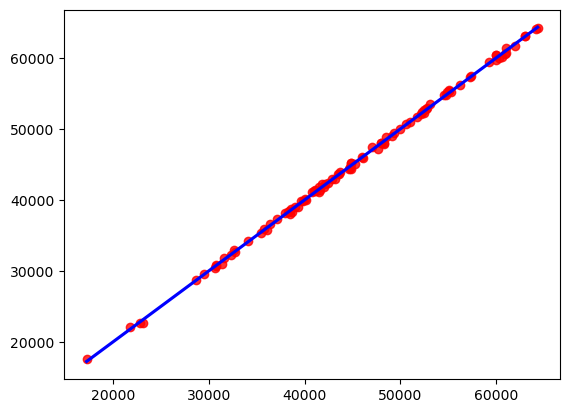

In [14]:
sb.regplot(x = predicted_values, y = actual_values,
          line_kws={"color":"blue"},
          scatter_kws={"color":"red"})

### R Squared

In [15]:
r2_score(actual_values, predicted_values)

0.9994234310992767

### MSE

In [16]:
mean_squared_error(actual_values, predicted_values)

62253.96588894179

### RMSE

In [17]:
np.sqrt(mean_squared_error(actual_values, predicted_values))

249.50744656010127

### MAE

In [18]:
mean_absolute_error(actual_values, predicted_values)

212.72103051546065